In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# The dataset : 

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Here are the 10 classes in the dataset : 

class 0 : airplane																			
class 1 : automobile										
class 2 : bird										
class 3 : cat										
class 4 : deer										
class 5 : dog										
class 6 : frog										
class 7 : horse										
class 8 : ship										
class 9 : truck

(more on : https://www.cs.toronto.edu/~kriz/cifar.html)


# 1. Exploring and Preprocessing the data : 

The already exists in the tensorflow datasets so we can import it through it :

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

As we said above , we have 50000 images , 32x32 pixels and 3 color channels : 

In [3]:
x_train.shape

(50000, 32, 32, 3)

Let's take a look at the first image as an example. It is an image of a frog : 

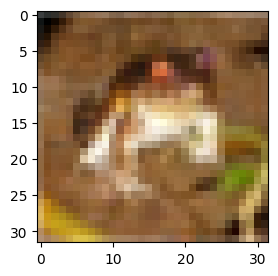

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])

Another example - image 9 is a cat : 

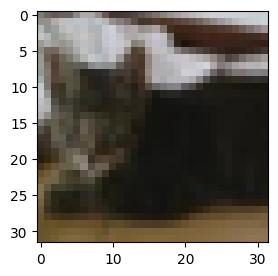

In [11]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[9])

We want to scale the x datasets between 0 and 1 => can be easily done by dividing the data by the max value : 

In [12]:
x_train[0].max()

255

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

In [15]:
x_test.shape

(10000, 32, 32, 3)

By looking at y_train (and y_test) we can see that it is in the form of integer values but we do not want our model to percieve those a s some type of continious value. We want instead to transform them into categorical values :

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_test = to_categorical(y_test,10)

# 2. Creating and Training the Model

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

Due to the dataset containing RGB images we have some added complexity compared to just grayscale images. For this reason we will need a second convolutional and a second pooling layer. 

In [126]:
model = Sequential()

#Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

In [129]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [130]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5284 - accuracy: 0.4463 - val_loss: 1.3890 - val_accuracy: 0.5076
Epoch 2/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.2280 - accuracy: 0.5634 - val_loss: 1.1594 - val_accuracy: 0.5847
Epoch 3/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.0895 - accuracy: 0.6189 - val_loss: 1.1062 - val_accuracy: 0.6049
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9812 - accuracy: 0.6597 - val_loss: 0.9992 - val_accuracy: 0.6558
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8923 - accuracy: 0.6909 - val_loss: 0.9953 - val_accuracy: 0.6535
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8203 - accuracy: 0.7141 - val_loss: 0.9722 - val_accuracy: 0.6635
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7551 - accuracy: 0.7382 - val_loss: 0.9715 -

# 3. Evaluating the model : 

In [131]:
metrics = pd.DataFrame(model.history.history)

In [132]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.528411,0.44634,1.389017,0.5076
1,1.228029,0.56338,1.159417,0.5847
2,1.089479,0.61886,1.106244,0.6049
3,0.981189,0.65968,0.999156,0.6558
4,0.892327,0.69088,0.995292,0.6535
5,0.820278,0.71408,0.972199,0.6635
6,0.755074,0.73818,0.971483,0.6691
7,0.697605,0.75796,0.999820,0.6652
8,0.642129,0.77648,0.980996,0.6791


<AxesSubplot: >

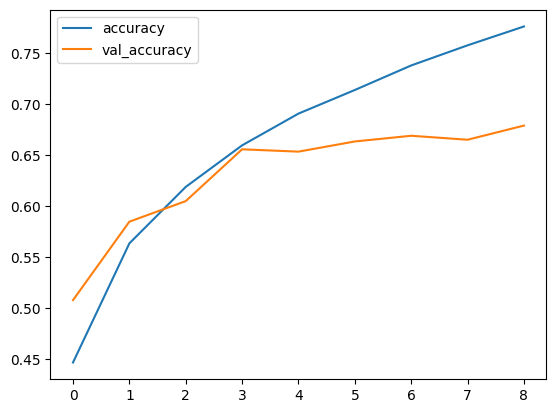

In [133]:
metrics[['accuracy', 'val_accuracy']].plot()

We can see that towards the last epochs the validation loss started increasing which explains why it iriggered the early stopping : 

<AxesSubplot: >

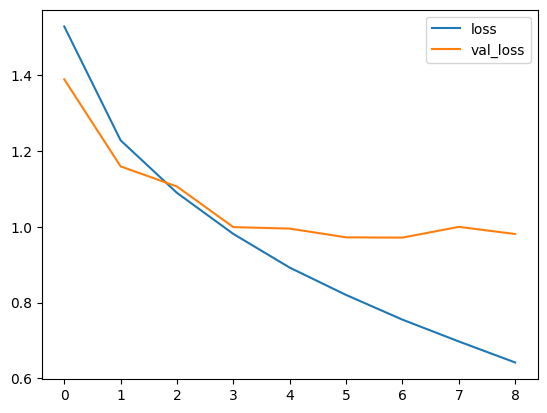

In [134]:
metrics[['loss',  'val_loss']].plot()

In [135]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9809957146644592, 0.679099977016449]

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 5ms/step


The predictions are now one hot encoded so we will turn them into labels just like the original y_test set is.

In [138]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [139]:
pred_non_cat = np.argmax(predictions,axis=1)

In [140]:
pred_non_cat

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

And now we can get our classification report :

In [141]:
print(classification_report(y_test,pred_non_cat))

              precision    recall  f1-score   support

           0       0.30      0.75      0.43      1000
           1       0.88      0.75      0.81      1000
           2       0.72      0.40      0.52      1000
           3       0.51      0.49      0.50      1000
           4       0.70      0.53      0.60      1000
           5       0.68      0.47      0.56      1000
           6       0.83      0.69      0.76      1000
           7       0.77      0.70      0.74      1000
           8       0.77      0.81      0.79      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.63     10000
   macro avg       0.70      0.63      0.65     10000
weighted avg       0.70      0.63      0.65     10000



Text(0.5, 1.0, 'Confusion matrix for the CIFAR-10 data set')

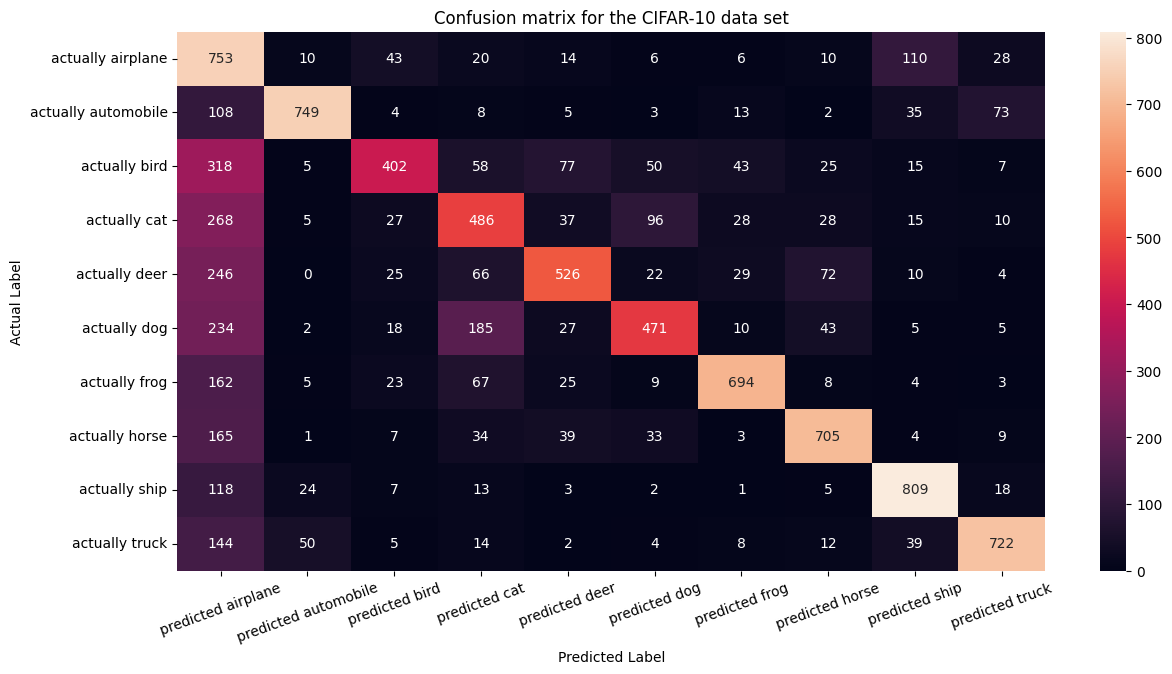

In [142]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog',
          'horse','ship','truck']
predicted_classes = ['predicted ' + item for item in classes]
actual_classes = ['actually ' + item for item in classes]
conf_df = pd.DataFrame(data=confusion_matrix(y_test,pred_non_cat),columns=predicted_classes,
            index=actual_classes)
plt.figure(figsize=(14,7))
sns.heatmap(conf_df,annot=True,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.title('Confusion matrix for the CIFAR-10 data set')

# 4. Predicting a given image

###### Let's assume we had one image of a number. Can our model classify the number correctly ?
We can grab for example the 16th image from the test set :

In [143]:
my_image = x_test[16]

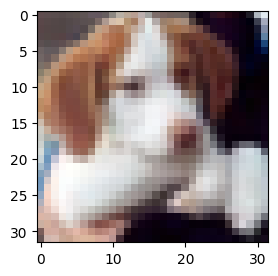

In [147]:
plt.figure(figsize=(3,3))
plt.imshow(my_image)

In [146]:
predict_image = (model.predict(my_image.reshape(1,32,32,3)) > 0.5).astype("int32")
print( np.argmax(predict_image,axis=1)) 

1/1 [==============================] - 0s 19ms/step
[5]


If we check at the link provided in the beginning or check the list provided in the beginning of this file we will see that in fact , 5 is a dog !
https://www.cs.toronto.edu/~kriz/cifar.html